<a href="https://colab.research.google.com/github/psahai10/AIFellowship/blob/main/Marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/rodsaldanha/targeted-marketing-campaign

In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
from datetime import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/marketing_campaign.csv', delimiter=';')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# 2. Exploratory Data Analysis

### 2a. Descriptive Analysis

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 2b. Missing Data

In [ ]:
# Missing data
def missing_rep(df):
    missing = df.isna().sum()
    missing = missing[missing > 0]
    missing_proportion = missing / df.shape[0]
    missing_3perc = missing_proportion > 0.03

    return pd.DataFrame({"Missings" : missing, 
           "Proportion of Missings" : missing_proportion,
           "Higher than 3%" : missing_3perc})

In [ ]:
missing_rep(df)

,Missings,Proportion of Missings,Higher than 3%
Income,24,0.010714,False


In [ ]:
def highlight_above_threshold(val):
    if val < .15:
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

In [ ]:
categorical_features = ["Education", "Marital_Status", 
      "Kidhome", "Teenhome", "AcceptedCmp1", 
      "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
      "AcceptedCmp5", "Complain"]

### 2c. Categorical Feature Analysis

In [ ]:
# Categorical features analysis
def describe_categorical_features(df, features, target, number, threshold):

    list_features = []
    if (type(features)==list):
        for feature in features:
            list_features.append(df.groupby([feature]).\
                      agg({target : ["count", "mean"]}))    

            new_df = pd.concat(list_features, keys=features)

            new_df = pd.DataFrame({"Number of observations" : new_df.iloc[:,0], 
                                "Discrimination ability" : new_df.iloc[:,1],
                                 "More than n observations" : new_df.iloc[:,0] > number})
    else:
        new_df = (df.groupby(features).agg({target : ["count", "mean"]}))
        
        new_df = pd.DataFrame({"Number of observations" : new_df.iloc[:,0], 
                               "Discrimination ability" : new_df.iloc[:,1],
                              "More than n observations" : new_df.iloc[:,0] > number })
        
    return new_df
features_sum = describe_categorical_features(df, categorical_features, "Response", 40, 0.15)
features_sum.style.applymap(highlight_above_threshold)

In [ ]:
data_ = df.copy()
low_discriminability_cat = ["Absurd", "Alone", "YOLO", "Married", "Together"]
data_['Marital_Status'].loc[data_['Marital_Status'].isin(low_discriminability_cat)] = 'Other'
data_.groupby("Marital_Status").count().index

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Index(['Divorced', 'Other', 'Single', 'Widow'], dtype='object', name='Marital_Status')

In [ ]:
low_discriminability_cat = ["Graduation", "2n Cycle", "Basic"]
data_['Education'].loc[data_['Education'].isin(low_discriminability_cat)] = 'Other'
data_.groupby("Education").count().index

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Index(['Master', 'Other', 'PhD'], dtype='object', name='Education')

In [ ]:
data_['NumberOff'] = data_['Kidhome'] + data_['Teenhome']
categorical_features.append("NumberOff")

In [ ]:
plot_df = describe_categorical_features(data_, categorical_features, "Response",40, 0.15).iloc[:,1]
plot_df = plot_df.sort_values(ascending=False)
plot_df = pd.DataFrame(plot_df)
plot_df = pd.DataFrame(plot_df.reset_index())

In [ ]:
plot_df.columns

Index(['level_0', 'level_1', 'Discrimination ability'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

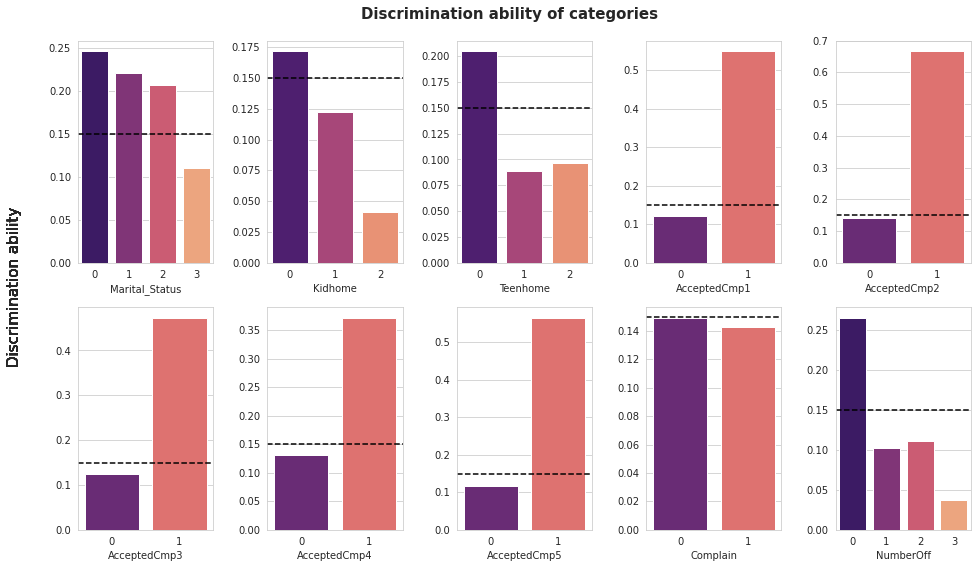

In [ ]:
def categorical_features_plot(df, features, target, threshold):

    sns.set_style("whitegrid")    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    i=1
    
    for feature in features:
        plot_df = describe_categorical_features(df, feature, target, 50, threshold).iloc[:,1]
        plot_df = plot_df.sort_values(ascending=False)
        plot_df = pd.DataFrame(plot_df)
        plot_df = pd.DataFrame(plot_df.reset_index())
        ax = sns.barplot(plot_df[feature], plot_df['Discrimination ability'], palette='magma')
        ax.set_ylabel("", size = 10)
        ax.axhline(y=threshold, color="black", ls='--')
        ax.set_xticklabels(plot_df.index, size=10)
        
        if i<11:
            plt.subplot(2, 5, i)
            i+=1
        
        fig.suptitle('Discrimination ability of categories', ha='center',
                     va='center', fontsize=15, y=0.92, fontweight='bold')
        fig.yaxis_title='Discrimination ability'
        fig.text(0.07, 0.5,'Discrimination ability', ha='center', va='center',
                 rotation='vertical', fontsize=15)
        fig.set_figheight(9)
        fig.set_figwidth(16)
        
categorical_features_plot(data_, categorical_features, "Response", 0.15)

### 2d. Date Transformations

In [ ]:
# Transforms date format in days
def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today() - datetime.strptime(dates_series[i], date_format)).days
    
    return result

data_["Days_Customer"] = days_since(list(data_.Dt_Customer), "%Y-%m-%d")
data_ = data_.drop(columns="Dt_Customer")
data_["Days_Customer"].head()

0    3108
1    2558
2    2757
3    2584
4    2606
Name: Days_Customer, dtype: int64

In [ ]:
data_.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumberOff,Days_Customer
0,5524,1957,Other,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,3108
1,2174,1954,Other,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,2558
2,4141,1965,Other,Other,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,2757
3,6182,1984,Other,Other,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,2584
4,5324,1981,PhD,Other,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,2606


### 2f. Description of Numerical Attributes

In [ ]:
# Describes numerical attributes
feat_n = list(data_.columns)
feat_n = list(filter(lambda x: x not in categorical_features, feat_n))

In [ ]:
feat_n

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Days_Customer']

In [ ]:
feat_n.remove("ID") # Removing ID column
data_[feat_n].describe() # Describing only Numerical Variables

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,Days_Customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,0.149107,2797.582143
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,0.356274,202.122512
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2444.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,0.000000,2624.750000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,0.000000,2799.500000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,0.000000,2973.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,1.000000,3143.000000


### 2g. Drop Constant Variables

In [ ]:
# Drops constant variables
std = data_[feat_n].describe().iloc[2,:]
std

Year_Birth                11.984069
Income                 25173.076661
Recency                   28.962453
MntWines                 336.597393
MntFruits                 39.773434
MntMeatProducts          225.715373
MntFishProducts           54.628979
MntSweetProducts          41.280498
MntGoldProds              52.167439
NumDealsPurchases          1.932238
NumWebPurchases            2.778714
NumCatalogPurchases        2.923101
NumStorePurchases          3.250958
NumWebVisitsMonth          2.426645
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                   0.356274
Days_Customer            202.122512
Name: std, dtype: float64

In [ ]:
const_lab = [std[std<0.05].index[0], std[std<0.05].index[1]]
std[std<0.05]

Z_CostContact    0.0
Z_Revenue        0.0
Name: std, dtype: float64

In [ ]:
data_.drop(labels=const_lab, axis=1, inplace=True)
feat_n = list(filter(lambda x: x not in const_lab, feat_n))

In [ ]:
feat_n

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Days_Customer']

### 2h. Remove Inconsistent Age

In [ ]:
# Removes inconsistant age
data_[(2020 - data_["Year_Birth"])>90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer
192,7829,1900,Other,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,1,2720
239,11004,1893,Other,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,1,2487
339,1150,1899,PhD,Other,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,0,2720


In [ ]:
#Removes inconsistent age
data_ = data_[(2020 - data_["Year_Birth"])<=90]

In [ ]:
#Drops rows with less missing income (about 1% of the data)
data_ = data_[~data_['Income'].isna()]
data_.shape

(2213, 28)

### 2i. Correlation Matrix

In [ ]:
# Correlation matrix
# The function to "zoom" in the correlation matrix.
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

def corr_matrix(df):
    # Compute the correlation matrix
    corr = df.corr()
    cmap = sns.diverging_palette(5, 250, as_cmap=True)
    
    vis = corr.style.background_gradient(cmap, axis=1)\
            .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
            .set_caption("Hover to magify")\
            .set_precision(2)\
            .set_table_styles(magnify())

    return vis

In [ ]:
feat_n_ = feat_n.copy()
feat_n.remove("Response") # Removing the Targer variable from the list of numerical features to be analyzed by correlation.
corr_matrix(data_[feat_n])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1.00,-0.16,-0.02,-0.16,-0.01,-0.03,-0.04,-0.02,-0.06,-0.07,-0.16,-0.13,-0.14,0.12,0.01
Income,-0.16,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55,-0.02
Recency,-0.02,-0.00,1.00,0.02,-0.01,0.02,0.00,0.03,0.02,0.00,-0.01,0.02,-0.00,-0.02,0.03
MntWines,-0.16,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.63,0.64,-0.32,0.17
MntFruits,-0.01,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.39,-0.13,0.30,0.49,0.46,-0.42,0.07
MntMeatProducts,-0.03,0.58,0.02,0.57,0.55,1.00,0.57,0.53,0.36,-0.12,0.31,0.73,0.49,-0.54,0.09
MntFishProducts,-0.04,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.43,-0.14,0.30,0.53,0.46,-0.45,0.08
MntSweetProducts,-0.02,0.44,0.03,0.39,0.57,0.53,0.58,1.00,0.36,-0.12,0.33,0.49,0.46,-0.42,0.08
MntGoldProds,-0.06,0.33,0.02,0.39,0.39,0.36,0.43,0.36,1.00,0.05,0.41,0.44,0.39,-0.25,0.16
NumDealsPurchases,-0.07,-0.08,0.00,0.01,-0.13,-0.12,-0.14,-0.12,0.05,1.00,0.24,-0.01,0.07,0.35,0.22


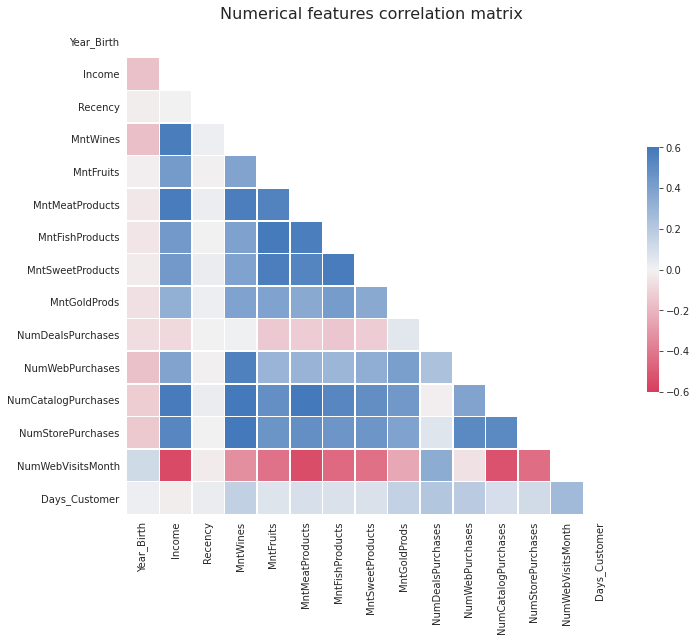

In [ ]:
corr = data_[feat_n].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(11,9))

cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, vmin=-.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Numerical features correlation matrix", fontsize=16)
plt.show()

### 2j. Distribution of Data According to target variable

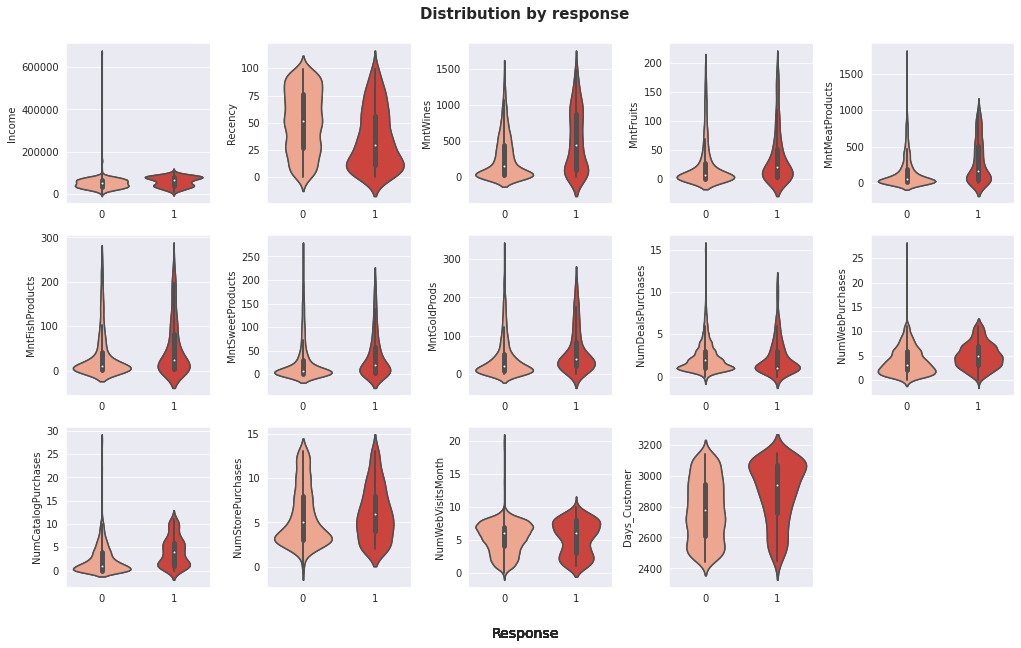

In [ ]:
# Distribution according to response
def num_feat_plot(df, feat_nlist, target, feat_clist = None):
    
    sns.set_style("darkgrid")    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    i=1
    
    if(target in feat_nlist):
        feat_nl = feat_nlist.copy()
        feat_nl.remove(target)

    
    for feat in feat_nl:
        sns.violinplot(data = df, y = feat, x = target)
        ax=sns.violinplot(data = df, y = feat, x = target, palette="Reds")
        ax.set_xlabel("", size = 10)
        
        if i<15:
            plt.subplot(3, 5, i)
            i+=1
        
        fig.suptitle('Distribution by response', ha='center',
                     va='center', fontsize=15, y=0.92, fontweight='bold')
        fig.text(0.5, 0.06, 'Response', ha='center', va='center', fontsize=14)
        fig.set_figheight(10)
        fig.set_figwidth(17)

    return

num_feat_plot(data_, feat_n_, "Response")

### 2k. Detection of Outliers

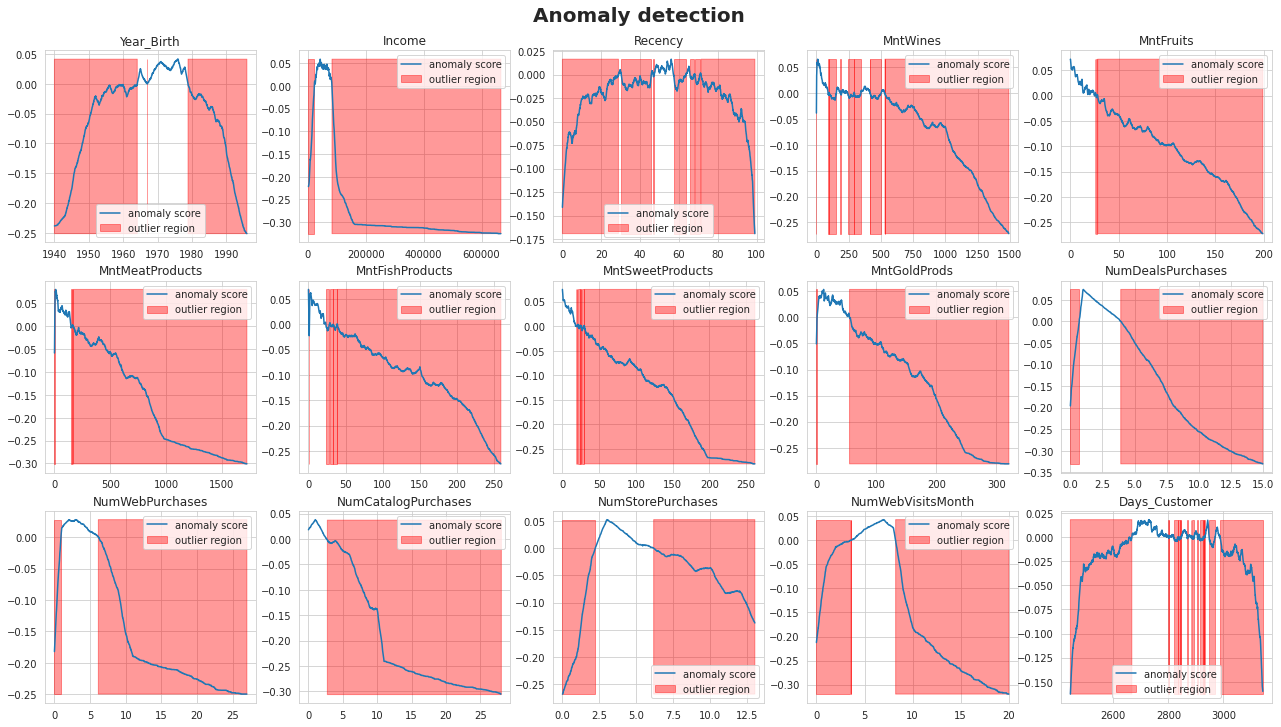

In [ ]:
# Outlier detection
from sklearn.ensemble import IsolationForest

def anom_plot(df, num_feat_list, l, c):
    sns.set_style("whitegrid") 
    fig, axs = plt.subplots(l, c, figsize=(22, 12), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i, column in enumerate(num_feat_list):
        isolation_forest = IsolationForest(n_estimators=500, contamination="auto")
        isolation_forest.fit(df[column].values.reshape(-1,1))

        xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
        anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)
    
        axs[i].plot(xx, anomaly_score, label='anomaly score')
        axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
        axs[i].legend()
        axs[i].set_title(column)
        
    fig.suptitle('Anomaly detection', ha='center',
                     va='center', fontsize=20, y=0.92, fontweight='bold')
        
    return
    
anom_plot(data_, feat_n, 3, 5)

In [ ]:
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

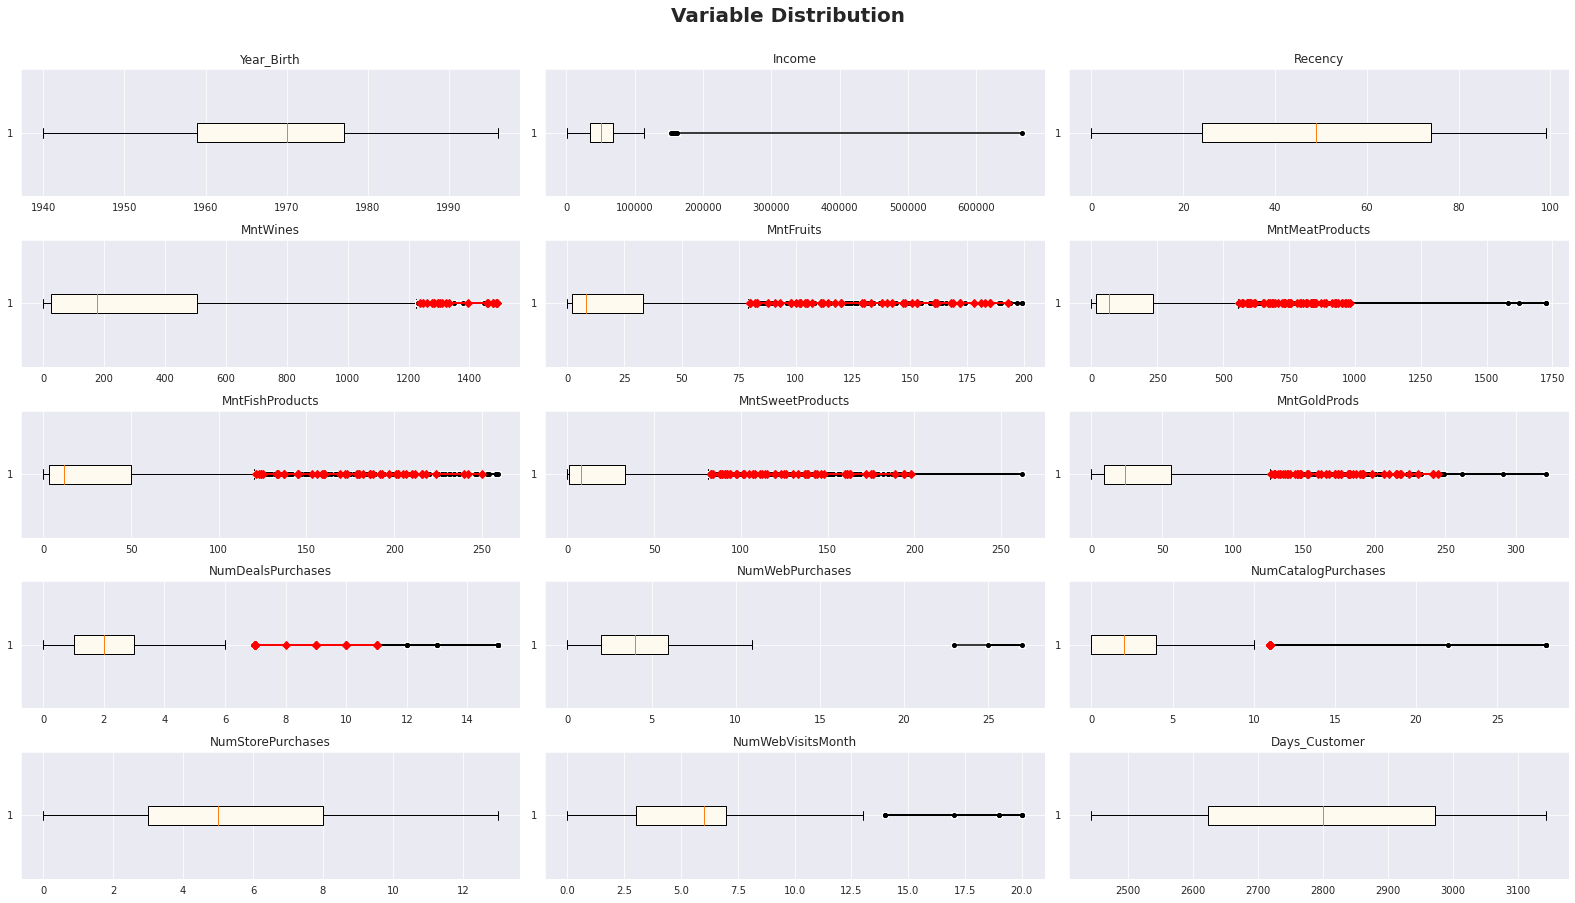

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def bivariate_outlier_id_plot(df, list_num_features, target, n_bins=20):
    sns.set_style("darkgrid") 
    fig = plt.figure(figsize=(22, 12))
    color = "floralwhite"
    i=1
    for feature in list_num_features:
        if feature == "Income":
            ser = df[feature].copy()
            ser.dropna(inplace=True)
        else:
            ser = df[feature]
          
        # box plots
        thresholds = filter_by_iqr(ser, 1.5, True)
        outliers = df[[feature, target]][df[feature]>thresholds[1]]

        ax = fig.add_subplot(5, 3, i)

        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), 
                         vert=False, patch_artist=True, sym="w")                                                                  
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==0], np.ones(sum(outliers.iloc[:, 1]==0)), color="black", marker = "o", markersize=4)
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==1], np.ones(sum(outliers.iloc[:, 1]==1)), color="red", marker = "D", markersize=6)
        ax.set_title(feature)
        box['boxes'][0].set_facecolor(color)

        i+=1
        
    fig.suptitle('Variable Distribution',  ha='center',
                     va='center', fontsize=20, y=1.03, fontweight='bold')

    plt.tight_layout()
    plt.show()

bivariate_outlier_id_plot(data_, feat_n, "Response", n_bins=20)

### 2k. Split of Dataset

In [ ]:
seeds = [4, 56, 92, 105, 400]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_,
                                                    data_["Response"],
                                                    test_size=0.3,
                                                    random_state=seeds[0])

### 2l. Multivariate outlier detection

In [ ]:
# Simple function to check if the matrix is positive definite 
#(for example, it will return False if the matrix contains NaN).
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False 

# The function to calculate the Mahalanobis Distance. Returns a list of distances.
def MahalanobisDist(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            diff = data - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
def MD_detectOutliers(data, extreme=False):
    MD = MahalanobisDist(data)

    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [ ]:
data_aux = X_train[feat_n_]
outliers_i = MD_detectOutliers(np.array(data_aux))
len(outliers_i)

36

In [ ]:
outliers = pd.DataFrame()
for i in outliers_i:
    outliers = outliers.append(data_aux.iloc[i,:])
    
outliers.head()

,Days_Customer,Income,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Year_Birth
914,3017.0,95529.0,250.0,29.0,24.0,890.0,27.0,770.0,3.0,1.0,7.0,7.0,3.0,29.0,1.0,1994.0
1743,2973.0,70321.0,82.0,23.0,191.0,751.0,26.0,303.0,5.0,1.0,13.0,6.0,4.0,6.0,1.0,1947.0
1946,3048.0,63211.0,205.0,193.0,145.0,459.0,26.0,145.0,8.0,2.0,7.0,3.0,2.0,3.0,1.0,1982.0
203,3048.0,102160.0,76.0,29.0,58.0,138.0,176.0,763.0,9.0,0.0,10.0,7.0,4.0,54.0,1.0,1977.0
855,2898.0,60474.0,234.0,199.0,170.0,303.0,9.0,265.0,2.0,7.0,12.0,10.0,7.0,25.0,0.0,1979.0


In [ ]:
# Drop Outliers
X_train = X_train[~X_train.index.isin(outliers.index)]
y_train = y_train[~y_train.index.isin(outliers.index)]

In [ ]:
# Percentage of Monetary Units spent on gold products out of the total spent
X_train.shape[0]

1549

# 3. Feature Engineering
## Business Oriented Features:
1. Percentage of Monetary Units spent on gold products out of the total spent
2. Number of Accepted Campaigns out of the last 5 Campaigns
3. Proportion of Accepted Campaigns out of the last 5 Campaigns
4. Proportion of Monetary Units spent on Wine out of the total spent
5. Proportion of Monetary Units spent on Fruits out of the total spent
6. Proportion of Monetary Units spent on Meat out of the total spent
7. Proportion of Monetary Units spent on Fish out of the total spent
8. Total Sum of Money Spent on Products
10. Total Sum of Money Spent on Products/ Income (Buying Potential)
11. Frequency of Purchases
12. Creating Recency, Frequency, Monetary Value (RFM)

In [ ]:
# Percentage of Monetary Units spent on gold products out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = X_train["MntGoldProds"].iloc[i]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
X_train["PrpGoldProds"] = aux
X_train["PrpGoldProds"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1378    0.080537
1580    0.071429
1047    0.008985
769     0.147959
1340    0.049180
Name: PrpGoldProds, dtype: float64

In [ ]:
X_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,1,2813,0.080537
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,3,2601,0.071429
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,1,2703,0.008985
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,1,2843,0.147959
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,1,2475,0.049180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,564,1981,PhD,Other,56937.0,1,0,81,746,8,125,11,8,8,7,8,6,9,6,0,1,0,0,0,0,1,1,3138,0.008909
1941,5138,1950,Other,Other,28320.0,0,1,68,19,1,14,3,2,4,1,1,0,3,8,0,0,0,0,0,0,0,1,2975,0.102564
725,7212,1966,Other,Other,44794.0,0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,1,2465,0.065574
185,3518,1983,Other,Other,25271.0,1,0,45,10,1,18,10,4,7,1,1,1,2,9,0,0,0,0,0,0,0,1,3015,0.162791


In [ ]:
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = X_test["MntGoldProds"].iloc[i]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
X_test["PrpGoldProds"] = aux
X_test["PrpGoldProds"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.124874
1968    0.038517
288     0.019310
945     0.029654
1359    0.100840
Name: PrpGoldProds, dtype: float64

In [ ]:
# Number of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_train.shape[0]


for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_train["NmbAccCmps"] = aux
X_train["NmbAccCmps"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


1378    1
1580    0
1047    0
769     0
1340    1
Name: NmbAccCmps, dtype: int64

In [ ]:
# Number of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
X_test["NmbAccCmps"] = aux
X_test["NmbAccCmps"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


168     0
1968    1
288     0
945     2
1359    0
Name: NmbAccCmps, dtype: int64

In [ ]:
# Proportion of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_train["PrpAccCmps"] = aux
X_train["PrpAccCmps"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.2
1580    0.0
1047    0.0
769     0.0
1340    0.2
Name: PrpAccCmps, dtype: float64

In [ ]:
# Proportion of Accepted Campaigns out of the last 5 Campaigns
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
X_test["PrpAccCmps"] = aux
X_test["PrpAccCmps"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.0
1968    0.2
288     0.0
945     0.4
1359    0.0
Name: PrpAccCmps, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Wine out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntWines"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpWines"] = aux
X_train["PrpWines"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.939597
1580    0.571429
1047    0.415993
769     0.767857
1340    0.898361
Name: PrpWines, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Wine out of the total spent
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntWines"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpWines"] = aux
X_test["PrpWines"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.278953
1968    0.382267
288     0.272414
945     0.960461
1359    0.663866
Name: PrpWines, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Fruits out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFruits"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpFruits"] = aux
X_train["PrpFruits"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.000000
1580    0.071429
1047    0.086253
769     0.017857
1340    0.000000
Name: PrpFruits, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Fruits out of the total spent
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFruits"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpFruits"] = aux
X_test["PrpFruits"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


168     0.163142
1968    0.058140
288     0.126207
945     0.000000
1359    0.008403
Name: PrpFruits, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Meat out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntMeatProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpMeat"] = aux
X_train["PrpMeat"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.060403
1580    0.357143
1047    0.299191
769     0.188776
1340    0.068852
Name: PrpMeat, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Meat out of the total spent
aux = [0]* X_test.shape[0]


for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntMeatProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpMeat"] = aux
X_test["PrpMeat"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


168     0.307150
1968    0.401890
288     0.389655
945     0.039539
1359    0.260504
Name: PrpMeat, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Fish out of the total spent
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(X_train[["MntFishProducts"]].iloc[i,:]/sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_train["PrpFish"] = aux
X_train["PrpFish"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.000000
1580    0.000000
1047    0.150943
769     0.025510
1340    0.013115
Name: PrpFish, dtype: float64

In [ ]:
# Proportion of Monetary Units spent on Fish out of the total spent
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(X_test[["MntFishProducts"]].iloc[i,:]/sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
X_test["PrpFish"] = aux
X_test["PrpFish"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.174220
1968    0.089390
288     0.114483
945     0.000000
1359    0.033613
Name: PrpFish, dtype: float64

In [ ]:
# Monetary
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_train["Mnt"] = aux
X_train["Mnt"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378     298
1580      14
1047    1113
769      392
1340     305
Name: Mnt, dtype: int64

In [ ]:
# Monetary
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
X_test["Mnt"] = aux
X_test["Mnt"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168      993
1968    1376
288     1450
945     1214
1359     119
Name: Mnt, dtype: int64

In [ ]:
# Buy Potential
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = float(sum(X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_train[["Income"]].iloc[i,:])*2))   
    
X_train["BuyPot"] = aux
X_train["BuyPot"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    0.002595
1580    0.000202
1047    0.007224
769     0.003158
1340    0.003042
Name: BuyPot, dtype: float64

In [ ]:
# Buy Potential
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = float(sum(X_test[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((X_test[["Income"]].iloc[i,:])*2))
    
X_test["BuyPot"] = aux
X_test["BuyPot"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     0.007416
1968    0.009471
288     0.009069
945     0.011772
1359    0.001786
Name: BuyPot, dtype: float64

In [ ]:
# Frequency
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    aux[i] = sum(X_train[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_train["Freq"] = aux
X_train["Freq"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1378    15
1580     4
1047    27
769     18
1340    13
Name: Freq, dtype: int64

In [ ]:
# Frequency
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    aux[i] = sum(X_test[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
X_test["Freq"] = aux
X_test["Freq"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


168     15
1968    21
288     22
945     19
1359    10
Name: Freq, dtype: int64

In [ ]:
# Creating RFM feature using Recency, Freq and Mnt:
feature_list, n_bins = ["Recency", "Freq", "Mnt"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(X_train[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

X_train["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Freq_bin'] + rfb_dict['Mnt_bin']).astype(int)
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,1,2813,0.080537,1,0.2,0.939597,0.000000,0.060403,0.000000,298,0.002595,15,433
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,3,2601,0.071429,0,0.0,0.571429,0.071429,0.357143,0.000000,14,0.000202,4,411
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,1,2703,0.008985,0,0.0,0.415993,0.086253,0.299191,0.150943,1113,0.007224,27,555
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,1,2843,0.147959,0,0.0,0.767857,0.017857,0.188776,0.025510,392,0.003158,18,343
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,1,2475,0.049180,1,0.2,0.898361,0.000000,0.068852,0.013115,305,0.003042,13,133


In [ ]:
 #Creating RFM feature using Recency, Freq and Mnt:
feature_list, n_bins = ["Recency", "Freq", "Mnt"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(X_test[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=X_test.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

X_test["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Freq_bin'] + rfb_dict['Mnt_bin']).astype(int)
X_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM
168,6637,1988,Other,Single,66951.0,0,0,46,277,162,305,173,76,124,1,3,4,7,1,0,0,0,0,0,0,0,0,2683,0.124874,0,0.0,0.278953,0.163142,0.307150,0.174220,993,0.007416,15,334
1968,8537,1949,Other,Widow,72643.0,0,0,60,526,80,553,123,94,53,1,3,10,7,2,0,0,0,1,0,0,1,0,2931,0.038517,1,0.2,0.382267,0.058140,0.401890,0.089390,1376,0.009471,21,245
288,10102,1966,Other,Widow,79946.0,0,0,19,395,183,565,166,141,28,1,5,11,5,3,0,0,0,0,0,0,0,0,2492,0.019310,0,0.0,0.272414,0.126207,0.389655,0.114483,1450,0.009069,22,555
945,3202,1987,PhD,Other,51563.0,0,0,60,1166,0,48,0,0,36,1,4,4,10,8,0,1,1,0,0,0,0,0,3080,0.029654,2,0.4,0.960461,0.000000,0.039539,0.000000,1214,0.011772,19,245
1359,7275,1971,Master,Single,33316.0,1,1,34,79,1,31,4,4,12,3,2,1,4,6,0,0,0,0,0,0,0,2,2712,0.100840,0,0.0,0.663866,0.008403,0.260504,0.033613,119,0.001786,10,422


# 4. Feature Transformation
### 1. Min_Max_Scaler
### 2. Box-Cox Transformation
### 3. Determine best transformation: log, sqrt, exp, ^1/4, ^2, ^4
### 4. Replace old features with transformed features
### 5. Merge Categories with low discrimination ability
### 6. Principal Component Analysis
### 7. Get Dummies for categories

In [ ]:
feat_n.extend(('PrpGoldProds',
       'NmbAccCmps', 'PrpAccCmps', 'PrpWines', 'PrpFruits', 'PrpMeat',
       'PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'))

In [ ]:
feat_n

['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_Customer',
 'PrpGoldProds',
 'NmbAccCmps',
 'PrpAccCmps',
 'PrpWines',
 'PrpFruits',
 'PrpMeat',
 'PrpFish',
 'Mnt',
 'BuyPot',
 'Freq',
 'RFM']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

suffix = "_t"

data_scaler = X_train[feat_n]
data_scaler_test = X_test[feat_n]

fscaler = MinMaxScaler()
scaled_d = fscaler.fit_transform(data_scaler.values)
scaled_d_test = fscaler.transform(data_scaler_test.values)

colnames = [s + suffix for s in data_scaler.columns]

X_train = pd.concat([X_train, pd.DataFrame(scaled_d, index=data_scaler.index, columns=colnames)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(scaled_d_test, index=data_scaler_test.index, columns=colnames)], axis=1)

X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,1,2813,0.080537,1,0.2,0.939597,0.000000,0.060403,0.000000,298,0.002595,15,433,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.035714,0.461538,0.35,0.527221,0.009534,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.117860,0.157699,0.340909,0.725225
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,3,2601,0.071429,0,0.0,0.571429,0.071429,0.357143,0.000000,14,0.000202,4,411,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.153846,0.30,0.223496,0.008456,0.00,0.00,0.587755,0.093651,0.350847,0.000000,0.003620,0.011367,0.090909,0.675676
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,1,2703,0.008985,0,0.0,0.415993,0.086253,0.299191,0.150943,1113,0.007224,27,555,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.250000,0.923077,0.15,0.369628,0.001064,0.00,0.00,0.427878,0.113088,0.292117,0.226415,0.445696,0.440780,0.613636,1.000000
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,1,2843,0.147959,0,0.0,0.767857,0.017857,0.188776,0.025510,392,0.003158,18,343,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.035714,0.538462,0.30,0.570201,0.017515,0.00,0.00,0.789796,0.023413,0.180217,0.038265,0.155672,0.192156,0.409091,0.522523
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,1,2475,0.049180,1,0.2,0.898361,0.000000,0.068852,0.013115,305,0.003042,13,133,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.035714,0.461538,0.30,0.042980,0.005822,0.25,0.25,0.924028,0.000000,0.058682,0.019672,0.120676,0.185058,0.295455,0.049550


In [ ]:
from scipy import stats
# Receives a dataframe consisting only of scaled features and the target, and the name of the target feature.
# Returns both the dataframe with the features already transformed to the best transformation and a dictionary
# containing the name of each feature with its best transformation name.
def power_transf(df, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in df.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(df[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: df[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        df[feature] = best_power_trans
        
    return df, best_power_dict

In [ ]:
def power_transf(X_train, X_test, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in X_train.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(X_train[feature])
            feature_trans_test = trans_value(X_test[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.
                feature_trans_test.loc[np.isfinite(feature_trans_test)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=X_train.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: X_train[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        X_train[feature] = best_power_trans
        
    return X_train, X_test, best_power_dict

In [ ]:
# We need to create a dataframe containing only the scaled features with the Response.
df_pt = X_train.iloc[:,-15:]
df_pt_test = X_test.iloc[:,-15:]

df_pt["Response"] = X_train["Response"]

data_pt, data_pt_test, best_pt = power_transf(df_pt, df_pt_test, "Response")

print("Best Power Transformation for each feature:")
for key in best_pt:
    print("\t->", key, best_pt[key][1])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*input

Best Power Transformation for each feature:
	-> NumCatalogPurchases_t sqrt
	-> NumStorePurchases_t sqrt
	-> NumWebVisitsMonth_t exp
	-> Days_Customer_t **2
	-> PrpGoldProds_t **1/4
	-> NmbAccCmps_t x
	-> PrpAccCmps_t x
	-> PrpWines_t x
	-> PrpFruits_t sqrt
	-> PrpMeat_t x
	-> PrpFish_t **1/4
	-> Mnt_t **2
	-> BuyPot_t **2
	-> Freq_t sqrt
	-> RFM_t **2


In [ ]:
# Replacing the old columns of scaled features with the features transformed according to the best transformation
coln = data_pt.columns[:-1]

X_train.drop(columns=coln, inplace=True)
X_train[coln] = data_pt[coln]

X_test.drop(columns=coln, inplace=True)
X_test[coln] = data_pt_test[coln]

X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,1,2813,0.080537,1,0.2,0.939597,0.000000,0.060403,0.000000,298,0.002595,15,433,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.188982,0.679366,1.419068,0.277962,0.312477,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.013891,0.024869,0.583874,0.525952
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,3,2601,0.071429,0,0.0,0.571429,0.071429,0.357143,0.000000,14,0.000202,4,411,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.392232,1.349859,0.049950,0.303241,0.00,0.00,0.587755,0.306024,0.350847,0.000000,0.000013,0.000129,0.301511,0.456538
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,1,2703,0.008985,0,0.0,0.415993,0.086253,0.299191,0.150943,1113,0.007224,27,555,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.500000,0.960769,1.161834,0.136624,0.180591,0.00,0.00,0.427878,0.336285,0.292117,0.689805,0.198645,0.194287,0.783349,1.000000
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,1,2843,0.147959,0,0.0,0.767857,0.017857,0.188776,0.025510,392,0.003158,18,343,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.188982,0.733799,1.349859,0.325129,0.363794,0.00,0.00,0.789796,0.153012,0.180217,0.442284,0.024234,0.036924,0.639602,0.273030
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,1,2475,0.049180,1,0.2,0.898361,0.000000,0.068852,0.013115,305,0.003042,13,133,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.188982,0.679366,1.349859,0.001847,0.276228,0.25,0.25,0.924028,0.000000,0.058682,0.374510,0.014563,0.034246,0.543557,0.002455


In [ ]:
# Merging Categories
# in Marital_Status:  "Single" as 3, "Widow" as 2, "Divorced" as 1 and ["Married", "Together"] as 0
X_train["Marital_Status_bin"] = X_train['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

X_test["Marital_Status_bin"] = X_test['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

In [ ]:
# in Education: "Phd" as 2, "Master" as 1 and ['Graduation', 'Basic', '2n Cycle'] as 0
X_train["Education_bin"] = X_train['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

X_test["Education_bin"] = X_test['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

In [ ]:
X_train["Kidhome"] = X_train['Kidhome'].astype(int)
X_train["Teenhome"] = X_train['Teenhome'].astype(int)
X_train["NumberOff"] = X_train['NumberOff'].astype(int)

X_test["Kidhome"] = X_test['Kidhome'].astype(int)
X_test["Teenhome"] = X_test['Teenhome'].astype(int)
X_test["NumberOff"] = X_test['NumberOff'].astype(int)

In [ ]:
aux = [0]* X_train.shape[0]

for i in range(X_train.shape[0]):
    if(int(X_train[["Kidhome"]].iloc[i,:])+int(X_train[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_train["HasOffspring"] = aux
X_train["HasOffspring"].head()

1378    1
1580    1
1047    1
769     1
1340    1
Name: HasOffspring, dtype: int64

In [ ]:
aux = [0]* X_test.shape[0]

for i in range(X_test.shape[0]):
    if(int(X_test[["Kidhome"]].iloc[i,:])+int(X_test[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
X_test["HasOffspring"] = aux
X_test["HasOffspring"].head()

168     0
1968    0
288     0
945     0
1359    1
Name: HasOffspring, dtype: int64

In [ ]:
# Adding these new categorical features to the list:
categorical_features.append("Marital_Status_bin")
categorical_features.append("Education_bin")
categorical_features.append("HasOffspring")

# Our data now:
X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer,PrpGoldProds,NmbAccCmps,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,Mnt,BuyPot,Freq,RFM,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,Marital_Status_bin,Education_bin,HasOffspring
1378,8773,1971,Master,Other,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,1,2813,0.080537,1,0.2,0.939597,0.000000,0.060403,0.000000,298,0.002595,15,433,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.188982,0.679366,1.419068,0.277962,0.312477,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.013891,0.024869,0.583874,0.525952,0,1,1
1580,3790,1956,Other,Other,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,3,2601,0.071429,0,0.0,0.571429,0.071429,0.357143,0.000000,14,0.000202,4,411,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.392232,1.349859,0.049950,0.303241,0.00,0.00,0.587755,0.306024,0.350847,0.000000,0.000013,0.000129,0.301511,0.456538,0,0,1
1047,4002,1960,PhD,Other,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,1,2703,0.008985,0,0.0,0.415993,0.086253,0.299191,0.150943,1113,0.007224,27,555,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.500000,0.960769,1.161834,0.136624,0.180591,0.00,0.00,0.427878,0.336285,0.292117,0.689805,0.198645,0.194287,0.783349,1.000000,0,2,1
769,8786,1956,Master,Other,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,1,2843,0.147959,0,0.0,0.767857,0.017857,0.188776,0.025510,392,0.003158,18,343,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.188982,0.733799,1.349859,0.325129,0.363794,0.00,0.00,0.789796,0.153012,0.180217,0.442284,0.024234,0.036924,0.639602,0.273030,0,1,1
1340,9386,1962,Other,Other,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,1,2475,0.049180,1,0.2,0.898361,0.000000,0.068852,0.013115,305,0.003042,13,133,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.188982,0.679366,1.349859,0.001847,0.276228,0.25,0.25,0.924028,0.000000,0.058682,0.374510,0.014563,0.034246,0.543557,0.002455,0,0,1


In [ ]:
X_train.drop(["ID",'Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Days_Customer', 'PrpGoldProds','NmbAccCmps', 'PrpAccCmps', 'PrpWines',
            'PrpFruits', 'PrpMeat','PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'], 
           axis=1, inplace=True)

X_test.drop(["ID",'Education','Marital_Status','Year_Birth','Year_Birth',
            'Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Days_Customer', 'PrpGoldProds','NmbAccCmps', 'PrpAccCmps', 'PrpWines',
            'PrpFruits', 'PrpMeat','PrpFish', 'Mnt', 'BuyPot', 'Freq', 'RFM'], 
           axis=1, inplace=True)

In [ ]:
from sklearn.decomposition import PCA
columns = X_train.columns
columns = columns.drop(['Kidhome','Teenhome','NumberOff','AcceptedCmp3', 'AcceptedCmp4',
                        'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
                        'Marital_Status_bin', 'Education_bin', 'HasOffspring'])


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train[columns])
principalComponents_test = pca.transform(X_test[columns])

X_train["pc1"] = principalComponents[:,0]
X_train["pc2"] = principalComponents[:,1]
X_test["pc1"] = principalComponents_test[:,0]
X_test["pc2"] = principalComponents_test[:,1]

X_train.head()

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,Marital_Status_bin,Education_bin,HasOffspring,pc1,pc2
1378,0,1,0,1,0,0,0,0,0,1,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.188982,0.679366,1.419068,0.277962,0.312477,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.013891,0.024869,0.583874,0.525952,0,1,1,-0.089893,0.471065
1580,2,1,0,0,0,0,0,0,0,3,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.392232,1.349859,0.049950,0.303241,0.00,0.00,0.587755,0.306024,0.350847,0.000000,0.000013,0.000129,0.301511,0.456538,0,0,1,-0.560519,0.346503
1047,0,1,0,0,0,0,0,0,0,1,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.500000,0.960769,1.161834,0.136624,0.180591,0.00,0.00,0.427878,0.336285,0.292117,0.689805,0.198645,0.194287,0.783349,1.000000,0,2,1,0.749540,0.631881
769,0,1,0,0,0,0,0,0,0,1,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.188982,0.733799,1.349859,0.325129,0.363794,0.00,0.00,0.789796,0.153012,0.180217,0.442284,0.024234,0.036924,0.639602,0.273030,0,1,1,-0.092483,-0.008745
1340,0,1,0,1,0,0,0,0,0,1,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.188982,0.679366,1.349859,0.001847,0.276228,0.25,0.25,0.924028,0.000000,0.058682,0.374510,0.014563,0.034246,0.543557,0.002455,0,0,1,-0.204879,-0.359413


In [ ]:
feat_n =['Year_Birth_t', 'Income_t', 'Recency_t', 'MntWines_t', 'MntFruits_t',
       'MntMeatProducts_t', 'MntFishProducts_t', 'MntSweetProducts_t',
       'MntGoldProds_t', 'NumDealsPurchases_t', 'NumWebPurchases_t',
       'NumCatalogPurchases_t', 'NumStorePurchases_t', 'NumWebVisitsMonth_t',
       'Days_Customer_t', 'PrpGoldProds_t', 'NmbAccCmps_t', 'PrpAccCmps_t',
       'PrpWines_t', 'PrpFruits_t', 'PrpMeat_t', 'PrpFish_t', 'Mnt_t',
       'BuyPot_t', 'Freq_t', 'RFM_t', 'pc1', 'pc2']

In [ ]:
categorical_features.remove('Education')
categorical_features.remove('Marital_Status')

In [ ]:
cat_columns = ['Kidhome', 'Teenhome', 'NumberOff','Marital_Status_bin','Education_bin']
X_train = pd.get_dummies(X_train, prefix_sep="_",
                              columns=cat_columns)
X_test = pd.get_dummies(X_test, prefix_sep="_",
                              columns=cat_columns)
X_train.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,HasOffspring,pc1,pc2,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,NumberOff_0,NumberOff_1,NumberOff_2,NumberOff_3,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2
1378,0,1,0,0,0,0,0,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.188982,0.679366,1.419068,0.277962,0.312477,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.013891,0.024869,0.583874,0.525952,1,-0.089893,0.471065,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1580,0,0,0,0,0,0,0,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.392232,1.349859,0.049950,0.303241,0.00,0.00,0.587755,0.306024,0.350847,0.000000,0.000013,0.000129,0.301511,0.456538,1,-0.560519,0.346503,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
1047,0,0,0,0,0,0,0,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.500000,0.960769,1.161834,0.136624,0.180591,0.00,0.00,0.427878,0.336285,0.292117,0.689805,0.198645,0.194287,0.783349,1.000000,1,0.749540,0.631881,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
769,0,0,0,0,0,0,0,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.188982,0.733799,1.349859,0.325129,0.363794,0.00,0.00,0.789796,0.153012,0.180217,0.442284,0.024234,0.036924,0.639602,0.273030,1,-0.092483,-0.008745,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1340,0,1,0,0,0,0,0,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.188982,0.679366,1.349859,0.001847,0.276228,0.25,0.25,0.924028,0.000000,0.058682,0.374510,0.014563,0.034246,0.543557,0.002455,1,-0.204879,-0.359413,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
categorical_features.remove('Kidhome')
categorical_features.remove('Teenhome')
categorical_features.remove('NumberOff')
categorical_features.remove('Marital_Status_bin')
categorical_features.remove('Education_bin')

categorical_features.extend(('Kidhome_0', 'Kidhome_1',
       'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'NumberOff_0',
       'NumberOff_1', 'NumberOff_2', 'NumberOff_3', 'Marital_Status_bin_0',
       'Marital_Status_bin_1', 'Marital_Status_bin_2', 'Marital_Status_bin_3',
       'Education_bin_0', 'Education_bin_1', 'Education_bin_2'))

# 5. Feature Selection by Chi-Squared statistic test

In [ ]:
# Is given as input a dataframe, a list of continuous features names, a list of categorical features names,
# the name of the target feature and returns a dataframe with the discrimination ability of each feature and if
# its p-value is lower than 0.05.
# 10 is the default number of bins and uniform is the strategy used in the binning of continuous features.
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    return df_chi

In [ ]:
df_chisq_rank = chisq_ranker(X_train, feat_n, categorical_features, "Response")
df_chisq_rank.head(15)

,Chi-Squared,p-value,valid
NmbAccCmps_t,265.861099,2.488144e-56,True
PrpAccCmps_t,265.861099,2.488144e-56,True
pc1,190.063578,3.992407e-36,True
Mnt_t,150.742525,6.188952e-28,True
AcceptedCmp5,140.855841,1.730076e-32,True
RFM_t,129.856522,3.029569e-24,True
BuyPot_t,128.512011,5.754275e-24,True
MntWines_t,125.701760,9.059883e-23,True
AcceptedCmp1,113.364973,1.794980e-26,True
Income_t,109.514623,1.157827e-20,True


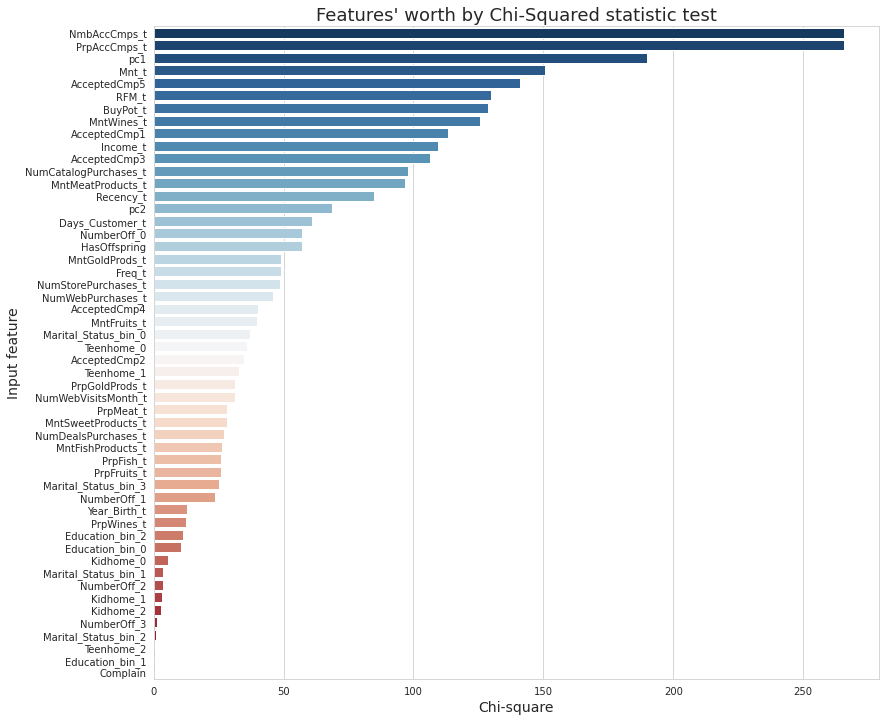

In [ ]:
sns.set_style('whitegrid') 

plt.subplots(figsize=(13,12))
pal = sns.color_palette("RdBu_r", len(df_chisq_rank))
rank = df_chisq_rank['Chi-Squared'].argsort().argsort()  

sns.barplot(y=df_chisq_rank.index,x=df_chisq_rank['Chi-Squared'], palette=np.array(pal[::-1])[rank])
plt.title("Features' worth by Chi-Squared statistic test", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Chi-square", fontsize=14)

plt.show()

# 6. Dealing with Unbalanced Dataset: SMOTE Oversampling

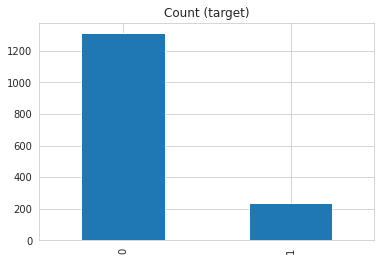

In [ ]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
print(type(y_train))
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth_t,Income_t,Recency_t,MntWines_t,MntFruits_t,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t,PrpGoldProds_t,NmbAccCmps_t,PrpAccCmps_t,PrpWines_t,PrpFruits_t,PrpMeat_t,PrpFish_t,Mnt_t,BuyPot_t,Freq_t,RFM_t,HasOffspring,pc1,pc2,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,NumberOff_0,NumberOff_1,NumberOff_2,NumberOff_3,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2
1378,0,1,0,0,0,0,0,0.545455,0.346618,0.222222,0.187542,0.000000,0.009861,0.000000,0.000000,0.074766,0.200000,0.185185,0.188982,0.679366,1.419068,0.277962,0.312477,0.25,0.25,0.966443,0.000000,0.050118,0.000000,0.013891,0.024869,0.583874,0.525952,1,-0.089893,0.471065,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1580,0,0,0,0,0,0,0,0.272727,0.204790,0.313131,0.005358,0.005025,0.002320,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.392232,1.349859,0.049950,0.303241,0.00,0.00,0.587755,0.306024,0.350847,0.000000,0.000013,0.000129,0.301511,0.456538,1,-0.560519,0.346503,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
1047,0,0,0,0,0,0,0,0.345455,0.468715,0.030303,0.310114,0.482412,0.192575,0.648649,0.202290,0.031153,0.066667,0.259259,0.500000,0.960769,1.161834,0.136624,0.180591,0.00,0.00,0.427878,0.336285,0.292117,0.689805,0.198645,0.194287,0.783349,1.000000,1,0.749540,0.631881,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
769,0,0,0,0,0,0,0,0.272727,0.375485,0.525253,0.201608,0.035176,0.042343,0.038610,0.000000,0.180685,0.266667,0.222222,0.188982,0.733799,1.349859,0.325129,0.363794,0.00,0.00,0.789796,0.153012,0.180217,0.442284,0.024234,0.036924,0.639602,0.273030,1,-0.092483,-0.008745,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1340,0,1,0,0,0,0,0,0.381818,0.301226,0.888889,0.183523,0.000000,0.011601,0.015444,0.022901,0.046729,0.066667,0.185185,0.188982,0.679366,1.349859,0.001847,0.276228,0.25,0.25,0.924028,0.000000,0.058682,0.374510,0.014563,0.034246,0.543557,0.002455,1,-0.204879,-0.359413,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,1,0,0,0,0,1,0.727273,0.343611,0.818182,0.499665,0.040201,0.071926,0.042471,0.030534,0.024922,0.466667,0.296296,0.462910,0.832050,1.349859,0.985725,0.180208,0.25,0.25,0.854470,0.108075,0.129973,0.368173,0.129033,0.231623,0.825723,0.009379,1,0.335459,-0.461978,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1941,0,0,0,0,0,0,0,0.163636,0.165498,0.686869,0.012726,0.005025,0.007541,0.011583,0.007634,0.012461,0.066667,0.037037,0.000000,0.480384,1.491825,0.576555,0.331947,0.00,0.00,0.501099,0.183353,0.352703,0.582823,0.000187,0.001691,0.337100,0.050726,1,-0.548190,-0.292122,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
725,0,0,0,0,0,0,0,0.454545,0.268033,1.000000,0.036169,0.000000,0.003480,0.000000,0.000000,0.012461,0.066667,0.074074,0.000000,0.480384,1.349859,0.000821,0.296826,0.00,0.00,0.910539,0.000000,0.105200,0.000000,0.000507,0.001652,0.369274,0.000005,1,-0.587835,-0.374067,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
185,0,0,0,0,0,0,0,0.763636,0.146520,0.454545,0.006698,0.005025,0.009861,0.038610,0.015267,0.021807,0.066667,0.037037,0.188982,0.392232,1.568312,0.666866,0.372586,0.00,0.00,0.239203,0.174617,0.413135,0.768521,0.000234,0.002605,0.337100,0.204940,1,-0.527011,-0.107477,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(type(y_train))
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

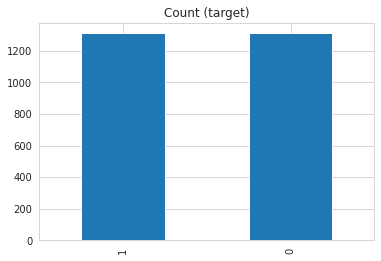

In [ ]:

y_train.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = scaler.transform(X_test)


# 7. Model Selection
1. Logistic Regression
2. Naive Bayes
3. Deep Neural Network

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC score: 0.999121265377856


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = LR.predict(X_test)
print('ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

ROC score: 0.999121265377856


In [ ]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=53))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
82/82 [==============================] - 1s 1ms/step - loss: 0.6545 - auc: 0.8078
Epoch 2/30
82/82 [==============================] - 0s 1ms/step - loss: 0.5374 - auc: 0.9823
Epoch 3/30
82/82 [==============================] - 0s 1ms/step - loss: 0.4403 - auc: 0.9885
Epoch 4/30
82/82 [==============================] - 0s 2ms/step - loss: 0.3505 - auc: 0.9925
Epoch 5/30
82/82 [==============================] - 0s 1ms/step - loss: 0.2651 - auc: 0.9948
Epoch 6/30
82/82 [==============================] - 0s 1ms/step - loss: 0.1925 - auc: 0.9978
Epoch 7/30
82/82 [==============================] - 0s 2ms/step - loss: 0.1275 - auc: 0.9987
Epoch 8/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0786 - auc: 1.0000
Epoch 9/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0434 - auc: 1.0000
Epoch 10/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0217 - auc: 1.0000
Epoch 11/30
82/82 [==============================] - 0s 1ms/step - lo

In [ ]:
cnn_model = model
metrics = cnn_model.evaluate(X_test, y_test)
print("{}: {}".format(cnn_model.metrics_names[1], metrics[1]))

21/21 [==============================] - 0s 2ms/step - loss: 9.8367e-08 - auc: 1.0000
auc: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[568   1]
 [  0  95]]
